In [1]:
from torchsummary import summary

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np

from scipy import misc

import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 5
num_classes = 10
batch_size = 32
learning_rate = 0.001

In [2]:

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
           )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        
        self.fc = nn.Linear(2048, num_classes)
        
    # 定义前向传播顺序
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out


In [4]:
model = ConvNet(num_classes).to(device)

summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]           1,216
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
         MaxPool2d-4           [-1, 16, 16, 16]               0
            Conv2d-5           [-1, 32, 16, 16]          12,832
       BatchNorm2d-6           [-1, 32, 16, 16]              64
              ReLU-7           [-1, 32, 16, 16]               0
         MaxPool2d-8             [-1, 32, 8, 8]               0
            Linear-9                   [-1, 10]          20,490
Total params: 34,634
Trainable params: 34,634
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.61
Params size (MB): 0.13
Estimated Total Size (MB): 0.75
---------------------------------------------

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_step = len(trainloader)
loss1_list=[]
acc1_list=[]
epoch_list=[]
for epoch in range(20):
    running_loss = 0.0
    running_corrects = 0
    for i, (images, labels) in enumerate(trainloader):
        # 注意模型在GPU中，数据也要搬到GPU中
        images = images.to(device)
        labels = labels.to(device)
        
        # 前向传播
        outputs = model(images)
        _,preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
    print(model.parameters())
    print(epoch+1)
    print(running_loss/len(trainset))
    print(running_corrects.double().item()/len(trainset))
    epoch_list.append(epoch+1)
    loss1_list.append(running_loss/len(trainset))
    acc1_list.append(running_corrects.double().item()/len(trainset))
    



In [7]:
class ConvNet_Deep(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet_Deep, self).__init__()
        self.conv1 = nn.Sequential(
            # 卷积层计算
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),
            #  批归一化
            nn.BatchNorm2d(16),

            nn.ReLU(),
            )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(16, 8, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(8),
            nn.ReLU(),
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(8, 8, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(8),
            nn.ReLU(),
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(8, 8, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(8),
            nn.ReLU(),
        )
        
        
        
        self.fc = nn.Linear(2048, num_classes)
        
    # 定义前向传播顺序
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out=self.conv3(out)
        out=self.conv4(out)
        out=self.conv5(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [8]:
model2=ConvNet_Deep(num_classes).to(device)

summary(model2,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]           1,216
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           6,416
       BatchNorm2d-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
         MaxPool2d-7           [-1, 16, 16, 16]               0
            Conv2d-8            [-1, 8, 16, 16]           3,208
       BatchNorm2d-9            [-1, 8, 16, 16]              16
             ReLU-10            [-1, 8, 16, 16]               0
           Conv2d-11            [-1, 8, 16, 16]           1,608
      BatchNorm2d-12            [-1, 8, 16, 16]              16
             ReLU-13            [-1, 8, 16, 16]               0
           Conv2d-14            [-1, 8,

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)

In [11]:
total_step = len(trainloader)
loss2_list=[]
acc2_list=[]
for epoch in range(20):
    running_loss = 0.0
    running_corrects = 0
    for i, (images, labels) in enumerate(trainloader):
        # 注意模型在GPU中，数据也要搬到GPU中
        images = images.to(device)
        labels = labels.to(device)
        
        # 前向传播
        outputs = model2(images)
        _,preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
    print(epoch+1)
    print(running_loss/len(trainset))
    print(running_corrects.double().item()/len(trainset))
    loss2_list.append(running_loss/len(trainset))
    acc2_list.append(running_corrects.double().item()/len(trainset))

1
1.381529408454895
0.5014
2
1.034356152114868
0.63484
3
0.9294517994117737
0.67188
4
0.8679418844604492
0.69562
5
0.8239513463783265
0.71162
6
0.7875979981422424
0.72388
7
0.7609650528335571
0.73394
8
0.7309231797218323
0.74498
9
0.7106542486000061
0.75198
10
0.6894291912841797
0.75976
11
0.6737751765441895
0.7643
12
0.6538984972476959
0.77354
13
0.6384205052089691
0.776
14
0.6236341123008728
0.78142
15
0.6107581218719482
0.78592
16
0.5974239669036865
0.79048
17
0.5815007359027863
0.79694
18
0.5707615133666992
0.79964
19
0.5585191724967956
0.80504
20
0.5493220317840576
0.8072


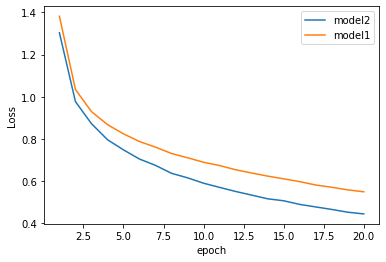

In [14]:
plt.plot(epoch_list, loss1_list,label="model2")
plt.plot(epoch_list, loss2_list,label="model1")
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

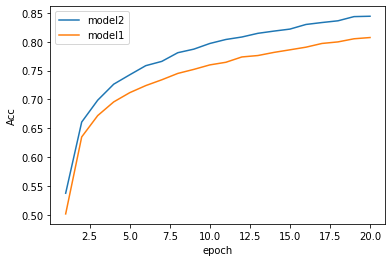

In [15]:
plt.plot(epoch_list, acc1_list,label="model2")
plt.plot(epoch_list, acc2_list,label="model1")
plt.ylabel('Acc')
plt.xlabel('epoch')
plt.legend()
plt.show()